In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["ANTHROPIC_API_KEY"] =  



Environment variables loaded successfully!


In [3]:
# import json for flight_param
import json

with open('/Users/aryanpanda/194/src/functions/google.json', 'r') as f:
    serp_params = json.load(f)


In [27]:
%pip install jsonschema

  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
Using cached jsonschema-4.25.1-py3-none-any.whl (90 kB)
Using cached attrs-25.3.0-py3-none-any.whl (63 kB)
Using cached referencing-0.36.2-py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.2/353.2 kB 2.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1.2 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
from jsonschema import validate, ValidationError

In [40]:
iata_schema = {
    "type": "object",
    "properties": {
        "from": {"type": "string", "description": "The city of the departure", "pattern": "^[A-Z]{3}$"},
        "destination": {"type": "string", "description": "The city of the destination", "pattern": "^[A-Z]{3}$"}
    }
}

validate(instance=iata_schema, schema=iata_schema)

In [52]:
def anthropic_IATA_call(iata_result: str):
    client = anthropic.Anthropic(api_key="YOUR_ANTHROPIC_API_KEY")
    
    response = client.messages.create(
        model="claude-sonnet-4-5",
        system="Return the IATA codes for the city provided by the user",
        tools=[{
            "name": "get_iata_codes",
            "description": "Return the IATA codes for the city provided by the user",
            "input_schema": iata_schema,
        }],
        tool_choice={"type": "tool", "name": "get_iata_codes"},
        messages=[{"role": "user", "content": f"Cities mapped: {iata_result}"}], 
        max_tokens=1024
    )
    iata_codes = response.content[0].input 
    return iata_codes

In [53]:
prompt = "Looking to book a flight from Oakland to New York"
anthropic_IATA_call(prompt)

{'from': 'OAK', 'destination': 'NYC'}

In [ ]:
# google flights function call
import anthropic

# flights_json is the source data (already created in previous cells)
# flight_json is the tool call schema (already loaded in previous cells)
def get_flight_api_params(prompt):
    client = anthropic.Anthropic(api_key="YOUR_ANTHROPIC_API_KEY")
    response = client.messages.create(
        model="claude-sonnet-4-5",
        max_tokens=1024,
        tools=[
            {
                "name": "get_flight_api_params",
                "description": "Follow the tool call schema to get the api params for google flights",
                "input_schema": serp_params,
            }
        ],
        tool_choice={"type": "tool", "name": "get_flight_api_params"},  # force use
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "Call the tool ONCE based on the context of the tool call, using the context of the users request"
                    },
                    {
                        "type": "text",
                        "text": "The prompt with the user's request and the iata codes: {prompt}"
                    }
                ]
            }
        ],
    )
    return response

In [50]:
%pip install langchain_core

  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.5 MB/s eta 0:00:00
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.5/449.5 kB 5.6 MB/s eta 0:00:00ta 0:00:01
Using cached jsonpatch-1.33-py2.py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 6.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.6/175.6 kB 6.6 MB/s eta 0:00:00
Using cached tenacity-9.1.2-py3-none-any.whl (28 kB)
Using cached jsonpointer-3.0.0-py2.py3-none-any.whl (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.2/238.2 kB 6.7 MB/s eta 0:00:00
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 640.6/640.6 kB 4

In [ ]:

def get_flight_api_params(iata_result: dict):
    client = anthropic.Anthropic(api_key=)

    # build a new structured prompt using the IATA result
    prompt_text = (
        f"Departure: {iata_result.get('from')} | "
        f"Arrival: {iata_result.get('destination')} | "
        f"Original user request included these IATA codes."
    )

    response = client.messages.create(
        model="claude-sonnet-4-5",
        max_tokens=1024,
        tools=[{
            "name": "get_flight_api_params",
            "description": "Follow the tool call schema to get the api params for google flights",
            "input_schema": serp_params,
        }],
        tool_choice={"type": "tool", "name": "get_flight_api_params"},
        messages=[{"role": "user", "content": prompt_text}],
    )

    # Extract structured params
    tool_block = response.content[0]
    params = tool_block.input  # final Google Flights params dict
    params['api_key'] = '4a871fe30bb1fed4dc0850f01d384a2fff2dee8a74046b902109785f1a9bd730'

    return params


# --- LangChain pipeline ---
iata_chain = RunnableLambda(anthropic_IATA_call)
flight_chain = RunnableLambda(get_flight_api_params)

pipeline = RunnableSequence(first=iata_chain, last=flight_chain)

# Example run
user_prompt = "Book me a flight from Oakland to Newark next week"
result = pipeline.invoke(user_prompt)

print(result)

{'engine': 'google_flights', 'departure_id': 'OAK', 'arrival_id': 'EWR', 'outbound_date': '<UNKNOWN>', 'return_date': '<UNKNOWN>', 'currency': 'USD', 'hl': 'en', 'gl': 'us', 'api_key': '4a871fe30bb1fed4dc0850f01d384a2fff2dee8a74046b902109785f1a9bd730'}


In [72]:
%pip install langgraph.graph

ERROR: Could not find a version that satisfies the requirement langgraph.graph (from versions: none)
ERROR: No matching distribution found for langgraph.graph
Note: you may need to restart the kernel to use updated packages.


In [3]:
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages


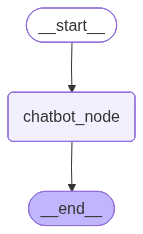

In [ ]:
from langchain_anthropic.chat_models import ChatAnthropic
from langgraph.graph import StateGraph
from typing import TypedDict
from typing_extensions import Annotated
from langgraph.graph import START, MessagesState, StateGraph, END

llm = ChatAnthropic(model="claude-sonnet-4-5", anthropic_api_key=)

class State(TypedDict):
    messages: Annotated[list, add_messages]


def chat_assistant(state: State):
    messages = llm.invoke(state["messages"])
    return {"messages": [messages]}


builder = StateGraph(State)

builder.add_node("chatbot_node", chat_assistant)

builder.add_edge(START, "chatbot_node")
builder.add_edge("chatbot_node", END)

graph = builder.compile()



messages = {"role": "user", "content": "Hello, how are you?"}
response = graph.invoke({"messages": [messages]})

builder.compile()







In [7]:
from langchain_core.messages import AIMessage
state = None

while True:
    in_message = input("You: ")
    if in_message == "exit":
        break
    if state is None:
        state = {"messages": [{"role": "user", "content": in_message}]}
    else:
        state["messages"].append([{"role": "user", "content": in_message}])
    # invoke the graph
    response = graph.invoke(state)

    # update state with model's reply (add_messages will merge correctly)
    state = response

    # print the assistant's reply
    last_msg = response["messages"][-1]
    if isinstance(last_msg, AIMessage):
        print(f"Bot: {last_msg.content}")
    else:
        print(f"Bot: {last_msg['content']}")



Bot: I don't have access to real-time weather information or the internet, so I can't tell you the current weather in Berkeley.

To get current weather conditions in Berkeley, you could:
- Check weather websites like weather.com, weather.gov, or wunderground.com
- Use a search engine and type "Berkeley weather"
- Use a weather app on your phone
- Ask a voice assistant with internet access like Siri, Google Assistant, or Alexa

Is there anything else I can help you with?


NotImplementedError: Unsupported message type: <class 'list'>
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/MESSAGE_COERCION_FAILURE 

In [9]:
%pip install -qU semantic-router


Note: you may need to restart the kernel to use updated packages.


In [2]:
from semantic_router.encoders import OpenAIEncoder




/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from semantic_router.encoders import OpenAIEncoder  # can also use HuggingFace
# ---- Define routes ----
routes = [
    Route(name="chatbot_node", utterances=[
        "hi", "hello", "how are you", "general conversation"
    ]),
    Route(name="flight_pipeline_node", utterances=[
        "book me a flight", "find flights", "plane ticket", "flight booking"
    ]),
]

# ---- Initialize encoder & router ----
encoder = OpenAIEncoder(api_key=)   # requires OPENAI_API_KEY env var
route_layer = RouteLayer(encoder=encoder, routes=routes)

# ---- Router node for LangGraph ----
def semantic_router_node(state: State):
    user_msg = state["messages"][-1]["content"]
    chosen_route = route_layer(user_msg).name
    return {"next": chosen_route}

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'Route' is not defined

In [ ]:
'''
Agent Structure:

Nodes:
- User
- AirBnB
- Hotel
- Tavily
- Google Flights
- Google Hotels
- Google Attractions


AP2! 



'''

In [ ]:
import requests

API_KEY = 

params = {
    "engine": "google_flights",
    "departure_id": "OAK",       # origin airport
    "arrival_id": "EWR",         # destination airport
    "outbound_date": "2025-11-07",
    "return_date": "2025-11-14", # optional, remove for one-way
    "currency": "USD",
    "hl": "en",
    "gl": "us",
    "api_key": API_KEY
}

url = "https://serpapi.com/search"
response = requests.get(url, params=params)
data = response.json()

# Print some results
for option in data.get("best_flights", []):
    for leg in option["flights"]:
        airline = leg["airline"]
        flight_no = leg["flight_number"]
        dep = leg["departure_airport"]["id"]
        arr = leg["arrival_airport"]["id"]
        time = leg["departure_airport"]["time"]
        print(f"{airline} {flight_no}: {dep} → {arr} at {time}")


Alaska AS 717: OAK → SEA at 2025-11-07 06:30
Alaska AS 477: SEA → EWR at 2025-11-07 10:05
Delta DL 3903: OAK → SLC at 2025-11-07 16:51
Delta DL 2038: SLC → EWR at 2025-11-07 23:25
Alaska AS 1359: OAK → SEA at 2025-11-07 14:49
Alaska AS 314: SEA → EWR at 2025-11-07 21:34
Delta DL 4061: OAK → SLC at 2025-11-07 05:55
Delta DL 2026: SLC → EWR at 2025-11-07 11:30


In [22]:
data

{'error': '`return_date` is required if `type` is `1` (Round trip).'}

In [19]:
def transform_flights(data):
    results = []
    for f in data.get("best_flights", []):
        flight_leg = f["flights"][0]  # main leg (extend if multiple)
        
        flight_number = flight_leg["flight_number"]
        airline = flight_leg["airline"]
        aircraft = flight_leg.get("airplane")
        origin = flight_leg["departure_airport"]
        dest = flight_leg["arrival_airport"]
        
        structured = {
            "flight": {
                "id": f"{flight_number}_{origin['time'].split()[0]}",
                "title": f"{airline} {flight_number} - {origin['id']} → {dest['id']}",
                "make": airline,
                "model": aircraft,
                "version": origin["time"].split()[0],
                "body_html": f"Flight operated by {airline} from {origin['name']} ({origin['id']}) "
                             f"to {dest['name']} ({dest['id']}).",
                "created_at": data["search_metadata"]["created_at"],
                "updated_at": data["search_metadata"]["processed_at"],
                "handle": f"{airline.lower()}-{flight_number.lower()}-{origin['id'].lower()}-{dest['id'].lower()}",
                "image": {
                    "x": flight_leg["airline_logo"],
                    "width": 70,
                    "height": 70
                },
                "options": {
                    "name": "Cabin",
                    "values": [flight_leg.get("travel_class", "Economy")]
                },
                "product_type": "Flight",
                "status": "active",
                "tags": f"{airline}, {aircraft}, {origin['id']}→{dest['id']}",
                "vendor": airline,
                "vendor_contact": {},
                "variants": [
                    {
                        "id": f"{flight_number}_ECONOMY",
                        "title": flight_leg.get("travel_class", "Economy"),
                        "price": f.get("price"),
                        "currency": data["search_parameters"]["currency"],
                        "sku": f"{flight_number}-{origin['id']}-{dest['id']}",
                        "requires_shipping": False
                    }
                ],
                "route": {
                    "origin": origin,
                    "destination": dest,
                    "duration_minutes": f["total_duration"],
                    "non_stop": not bool(f.get("layovers")),
                    "layovers": f.get("layovers", [])
                },
                "extras": {
                    "legroom": flight_leg.get("legroom"),
                    "amenities": flight_leg.get("extensions", []),
                    "carbon_emissions_kg": f["carbon_emissions"]["this_flight"] // 1000
                }
            }
        }
        results.append(structured)
    return results


In [30]:
# load transform_flights as a json

import json
flights_json = json.dumps(transform_flights(data))





In [31]:
flights_json

'[{"flight": {"id": "AS 717_2025-11-07", "title": "Alaska AS 717 - OAK \\u2192 SEA", "make": "Alaska", "model": "Boeing 737", "version": "2025-11-07", "body_html": "Flight operated by Alaska from Oakland International Airport (OAK) to Seattle\\u2013Tacoma International Airport (SEA).", "created_at": "2025-09-30 08:43:43 UTC", "updated_at": "2025-09-30 08:43:43 UTC", "handle": "alaska-as 717-oak-sea", "image": {"x": "https://www.gstatic.com/flights/airline_logos/70px/AS.png", "width": 70, "height": 70}, "options": {"name": "Cabin", "values": ["Economy"]}, "product_type": "Flight", "status": "active", "tags": "Alaska, Boeing 737, OAK\\u2192SEA", "vendor": "Alaska", "vendor_contact": {}, "variants": [{"id": "AS 717_ECONOMY", "title": "Economy", "price": 402, "currency": "USD", "sku": "AS 717-OAK-SEA", "requires_shipping": false}], "route": {"origin": {"name": "Oakland International Airport", "id": "OAK", "time": "2025-11-07 06:30"}, "destination": {"name": "Seattle\\u2013Tacoma Internatio

In [32]:
import json

# import the flight.json file
with open('/Users/aryanpanda/194/src/flight.json', 'r') as f:
    flight_json = json.load(f)




In [ ]:
import anthropic

# flights_json is the source data (already created in previous cells)
# flight_json is the tool call schema (already loaded in previous cells)

client = anthropic.Anthropic(api_key="YOUR_ANTHROPIC_API_KEY")
response = client.messages.create(
    model="claude-sonnet-4-5",
    max_tokens=1024,
    tools=[
        {
            "name": "get_flight_info",
            "description": "Find me the most expensive flight",
            "input_schema": flight_json,
        }
    ],
    tool_choice={"type": "tool", "name": "get_flight_info"},  # force use
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "From the dataset, call the tool ONCE based on the context of the tool call"
                },
                {
                    "type": "document",
                    "source": {
                        "type": "content",
                        "content": json.dumps(flights_json, indent=2)  # stringify your JSON
                    },
                    "title": "flights.json"
                }
            ]
        }
    ],
)

print(response)

Message(id='msg_012GQ2BE6TWqvkNV9BXt1zBA', content=[ToolUseBlock(id='toolu_01WDasUjpD8joeqfHxDi2Jua', input={'origin': 'OAK', 'destination': 'SLC', 'flight_date': '2025-11-07', 'flight_price': 658, 'selection_reason': 'Most expensive flight in the dataset'}, name='get_flight_info', type='tool_use')], model='claude-sonnet-4-5-20250929', role='assistant', stop_reason='tool_use', stop_sequence=None, type='message', usage=Usage(cache_creation=CacheCreation(ephemeral_1h_input_tokens=0, ephemeral_5m_input_tokens=0), cache_creation_input_tokens=0, cache_read_input_tokens=0, input_tokens=3230, output_tokens=120, server_tool_use=None, service_tier='standard'))


In [5]:
# AirBnB 
%pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 536.8 kB/s eta 0:00:00--:--

[notice] A new release of pip is available: 24.1.2 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import geopy

def city_country_to_bbox(city: str, country: str):
    """
    Given a city and country in natural language, return a bounding box:
    ne_lat, ne_long, sw_lat, sw_long
    """
    geolocator = Nominatim(user_agent="city_bbox_mapper")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    location = geocode(f"{city}, {country}", exactly_one=True)
    if not location or not hasattr(location, 'raw') or 'boundingbox' not in location.raw:
        raise ValueError(f"Could not find bounding box for {city}, {country}")
    bbox = location.raw['boundingbox']  # [south_lat, north_lat, west_long, east_long]
    sw_lat = float(bbox[0])
    ne_lat = float(bbox[1])
    sw_long = float(bbox[2])
    ne_long = float(bbox[3])
    return {
        "ne_lat": ne_lat,
        "ne_long": ne_long,
        "sw_lat": sw_lat,
        "sw_long": sw_long
    }


In [9]:
locations = city_country_to_bbox("San Diego", "United States")

In [10]:
locations

{'ne_lat': 33.114194,
 'ne_long': -116.9057417,
 'sw_lat': 32.5347979,
 'sw_long': -117.3098161}

In [ ]:
# create a LLM Agent that will take in what you want to be near into account when fitting location to the bounding box
# if places are dispersed find the most central location to events in the city provided by the user
# if the user wants to be near a specific place(s), find the most central location to those places
# if only a city is provided, find these locations out yourself and centralize




In [15]:
import pyairbnb
import json

# Define search parameters
currency = "USD"  # Currency for the search
check_in = "2025-10-01"  # Check-in date
check_out = "2025-10-04"  # Check-out date
ne_lat = locations["ne_lat"]
ne_long = locations["ne_long"]
sw_lat = locations["sw_lat"]
sw_long = locations["sw_long"]
zoom_value = 2  # Zoom level for the map
price_min = 1000
price_max = 0
place_type = "Private room" 
amenities = [4, 7]  # Example: Filter for listings with WiFi and Pool or leave empty
free_cancellation = False  # Filter for listings with free/flexible cancellation
language = "us"
proxy_url = ""

# Search listings within specified coordinates and date range using keyword arguments
search_results = pyairbnb.search_all(
    check_in=check_in,
    check_out=check_out,
    ne_lat=ne_lat,
    ne_long=ne_long,
    sw_lat=sw_lat,
    sw_long=sw_long,
    zoom_value=zoom_value,
    price_min=price_min,
    price_max=price_max,
    place_type=place_type,
    amenities=amenities,
    free_cancellation=free_cancellation,
    currency=currency,
    language=language,
    proxy_url=proxy_url
)

In [16]:
search_results

[{'room_id': 43766201,
  'category': '',
  'structuredContent': {'__typename': 'ExploreStructuredContent',
   'distance': [],
   'mapCategoryInfo': None,
   'mapPrimaryLine': [{'__typename': 'MainSectionMessage',
     'body': '1 sofa bed',
     'bodyA11yLabel': None,
     'bodyType': None,
     'fontWeight': None,
     'headline': None,
     'type': 'BEDINFO'}],
   'mapSecondaryLine': [],
   'primaryLine': [{'__typename': 'MainSectionMessage',
     'body': '1 sofa bed',
     'bodyA11yLabel': None,
     'bodyType': None,
     'fontWeight': None,
     'headline': None,
     'type': 'BEDINFO'}],
   'secondaryLine': [],
   'reviewSnippet': None,
   'explanation': []},
  'passportData': {'__typename': 'PassportCardData',
   'userId': '272376573',
   'profilePictureUrl': 'https://a0.muscache.com/im/pictures/user/da2a2c29-ff1e-4843-9c22-327a6a03182f.jpg?aki_policy=profile_x_medium',
   'profileLoggingId': None,
   'profileA11yLabel': None,
   'isVerified': True,
   'isSuperhost': False,
   'n

In [ ]:
from typing import TypedDict, List, Dict, Any, Optional, Literal

class FlightState(TypedDict):
    request_description: str
    flight_price: float | str
    flight_from: str
    flight_to: str
    flight_date: str
    flight_airline: Optional[str]
    flight_departure_time: Optional[str]
    flight_arrival_time: Optional[str]
    flight_duration: Optional[str]
    flight_stops: Optional[int]
    flight_status: Optional[str]

    
    
    

In [ ]:
# api call to get flight info


In [ ]:
from langgraph.graph import StateGraph, END
from langchain_core.messages import HumanMessage
from langchain_anthropic import ChatAnthropic
import requests, json

graph = StateGraph(dict)

def check_flight_function_call
def google_flights_node(state, prompt):
    params = {...}  # serpapi params
    data = requests.get("https://serpapi.com/search", params=params).json()
    state["raw_flights"] = data
    return state

def fetch_node(state):
    params = {...}  # serpapi params
    data = requests.get("https://serpapi.com/search", params=params).json()
    state["raw_flights"] = data
    return state

def transform_node(state):
    state["flights_json"] = transform_flights(state["raw_flights"])
    return state

llm = ChatAnthropic(model="claude-sonnet-4-5")

def select_node(state):
    prompt = f"""
    From the following flights: {json.dumps(state['flights_json'], indent=2)}
    Pick the most expensive flight and return it as JSON.
    """
    resp = llm.invoke([HumanMessage(content=prompt)])
    state["selected_flight"] = resp.content
    return state

graph.add_node("fetch", fetch_node)
graph.add_node("transform", transform_node)
graph.add_node("select", select_node)

graph.set_entry_point("fetch")
graph.add_edge("fetch", "transform")
graph.add_edge("transform", "select")
graph.add_edge("select", END)

app = graph.compile()
result = app.invoke({})
print(result["selected_flight"])
